In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
# === Configuration ===
DATA_DIR = "dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

In [5]:
# Load datasets first (no preprocessing)
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(256, 256),
    batch_size=BATCH_SIZE
)

raw_val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(256, 256),
    batch_size=BATCH_SIZE
)

# ✅ Get class names before mapping
class_names = raw_train_ds.class_names
print("Detected Classes:", class_names)

# Now map preprocessing
train_ds = raw_train_ds.map(preprocess_image).prefetch(tf.data.AUTOTUNE)
val_ds = raw_val_ds.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

Found 16452 files belonging to 3 classes.
Using 13162 files for training.
Found 16452 files belonging to 3 classes.
Using 3290 files for validation.
Detected Classes: ['Abdomen Ultrasound', 'Brain MRI', 'Breast Ultrasound']


In [6]:
# === Build Model ===
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# === Train Model ===
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 161s 385ms/step - accuracy: 0.9650 - loss: 0.1195 - val_accuracy: 1.0000 - val_loss: 1.0768e-04
Epoch 2/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 226s 548ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 8.8303e-05
Epoch 3/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 159s 386ms/step - accuracy: 0.9995 - loss: 0.0035 - val_accuracy: 0.9985 - val_loss: 0.0110
Epoch 4/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 195s 474ms/step - accuracy: 0.9972 - loss: 0.0083 - val_accuracy: 0.9997 - val_loss: 6.1658e-04
Epoch 5/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 153s 371ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9994 - val_loss: 0.0051
Epoch 6/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 145s 352ms/step - accuracy: 0.9981 - loss: 0.0081 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 7/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 309s 750ms/step - accuracy: 0.9996 - loss: 6.4653e-04 - val_accuracy: 0.9997 - val_loss: 5.5974e-04
Epoch 8/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 149s 361ms/step 

In [8]:
# === Save Model ===
model.save("scan_type_classifier_aspect_safe.h5")
print("✅ Model saved as scan_type_classifier_aspect_safe.h5")

✅ Model saved as scan_type_classifier_aspect_safe.h5


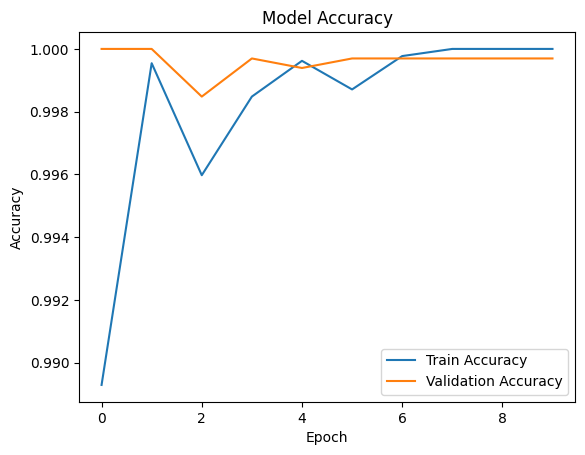

In [9]:
# === Plot Accuracy ===
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [10]:
model.save("scan_type_classifier_aspect_safe.keras")
